In [194]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import TfidfVectorizer


In [195]:
# Load iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [196]:
# Prepare the features (excluding the species column)
X = iris.drop('species', axis=1)

In [197]:
# Perform K-Means clustering with 3 clusters (since we know there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

In [198]:
# Add the cluster labels to the dataframe
iris['cluster'] = clusters

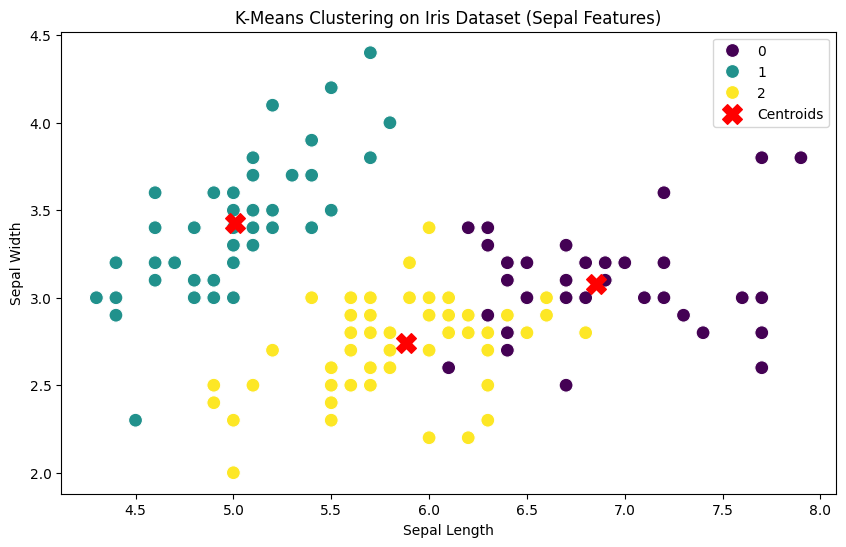

In [199]:
# Create a scatter plot using sepal length and width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', 
                hue='cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset (Sepal Features)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

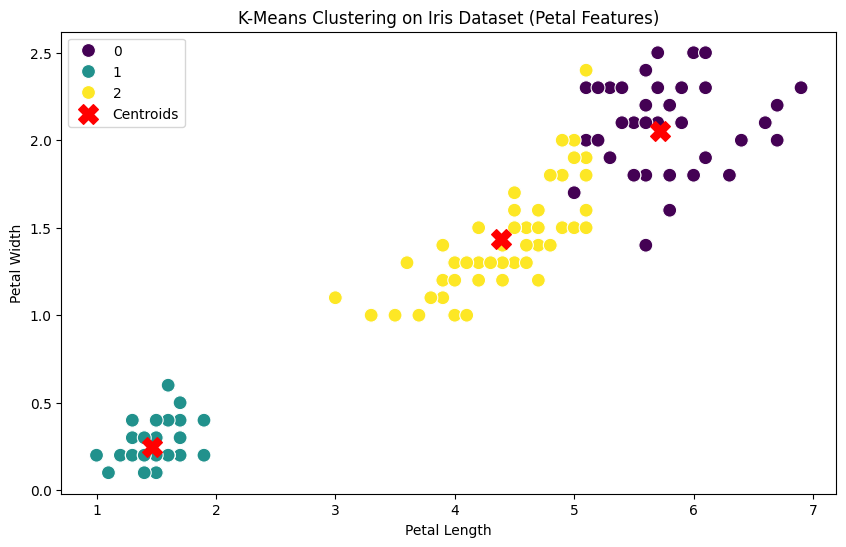

In [200]:
# Create another scatter plot using petal length and width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', 
                hue='cluster', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
           marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset (Petal Features)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

Evaluating a Clustering

Let check if the cluster samples corresspond to the species

The  best way to visualize it is by cross tabulating the clusters and the species

In [201]:
labels = iris['cluster']
species = iris['species']

Below is the Dataframe containg the cluster labels and the species

In [202]:
df = pd.DataFrame({'labels': labels, 'species': species})
df.head()

,labels,species
0,1,setosa
1,1,setosa
2,1,setosa
3,1,setosa
4,1,setosa


Let cross tablet the dataframe for easier readability

In [203]:
cluster_species = pd.crosstab(df['labels'], df['species'])
print(cluster_species) #cluster_species

species  setosa  versicolor  virginica
labels                                
0             0           3         36
1            50           0          0
2             0          47         14


|cluster|specie|
|-|-|
|0|virginica|
|1|setosa|
|2|versicolor|

There are 3 virginica species in versicolor
setosa are perfectily clustered
there are 14 versicolor in virginica specie 

__Measure of cluster quality__

It measure how spread clusters are and distance from each sample to centroid of its cluster.

In [204]:
# Compute inertia for each cluster
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 78.85566582597731


Effect of Cluster on Model Inertia

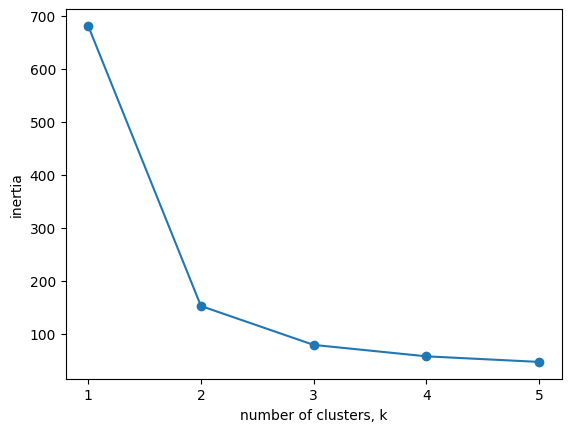

In [205]:
ks = range(1, 6)
inertias = []

for k in ks:
    # KMeans instance with k clusters
    km = KMeans(n_clusters=k)
    
    # Fit model to samples
    km.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(km.inertia_)
    
    # Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Transforming features for better clustering

In [206]:
# Instance of StandardScaler class
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [207]:
# Transform features
X_scaled = scaler.transform(X)

In [208]:
# Perform K-Means clustering with 3 clusters (since we know there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_scaled = kmeans.fit_predict(X_scaled)

In [209]:
# Add the cluster labels to the dataframe
iris['cluster_scaled'] = clusters_scaled

In [210]:
labels_scaled = iris['cluster_scaled']
species = iris['species']

In [211]:
df = pd.DataFrame({'labels_scaled': labels_scaled, 'species': species})
cluster_species_scaled = pd.crosstab(df['labels_scaled'], df['species'])
print(cluster_species_scaled)

species        setosa  versicolor  virginica
labels_scaled                               
0                   0          46         50
1                  33           0          0
2                  17           4          0


This transformation can be achieved at once using Pipeline

In [212]:
# instance make_pipeline
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=42))
clusters_pipeline = pipeline.fit_transform(X)

t_NSE for 2D maps

- it stand for t-distribution Stochastic Neighbor Embedding
- it maps data to 2D or 3D for visualization

Consider the 4 measurements in the dataset meaning samples has 4 dimension

In [213]:
# instance TNSE
tsne = TSNE(learning_rate=100)
X_tsne = tsne.fit_transform(X)
xs = X_tsne[:, 0]
ys = X_tsne[:, 1]

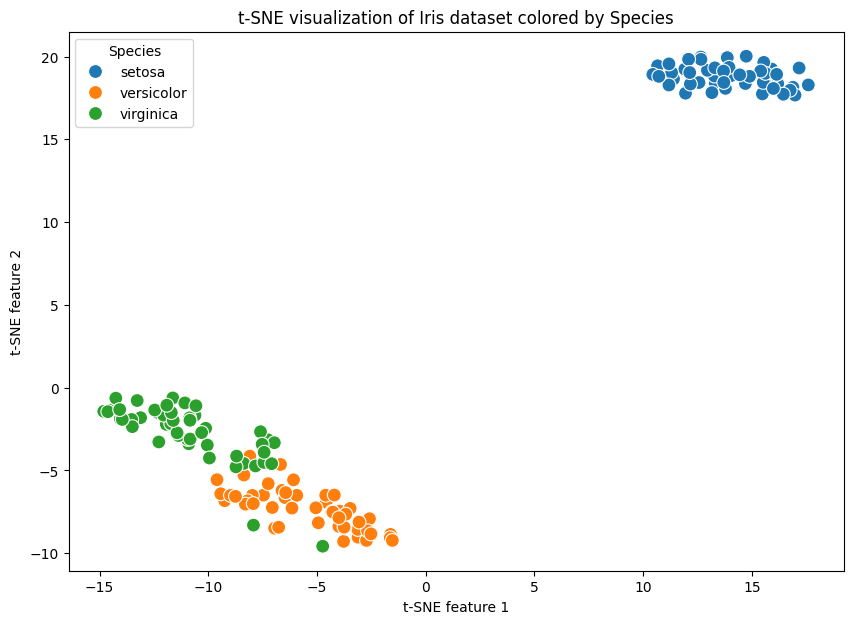

In [214]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=xs, y=ys, hue=species, s=100)
plt.title('t-SNE visualization of Iris dataset colored by Species')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Species')
plt.show()

Let scale the TSNE

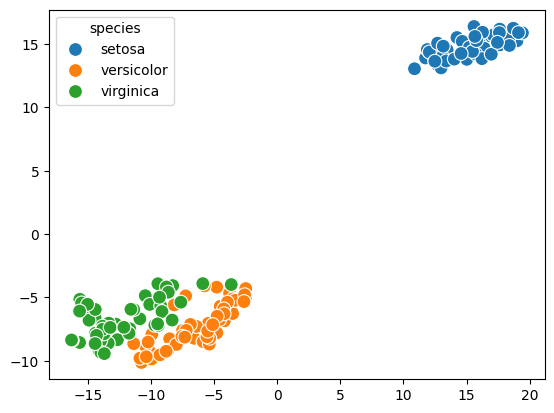

In [215]:
tsne = TSNE(learning_rate=100)
scaler = StandardScaler()
X_tsne_scaled = tsne.fit_transform(scaler.fit_transform(X))
xs_scaled = X_tsne_scaled[:, 0]
ys_scaled = X_tsne_scaled[:, 1]

# plot
sns.scatterplot(x=xs_scaled, y=ys_scaled, hue=species, s=100)
plt.show()

__Visualization using PCA Transformation__

principle component analysis (PCA) it provide efficient storae and computer and remove less imformative features (noise).

It reduces dimension in two steps
- Decorrelation
- Reduced dimension

Let determine the pearson correlation 

In [216]:
# Coreelation between sepal length and width
sepal_correlation, sepal_pval = pearsonr(X['sepal_length'], X['sepal_width'])
sepal_correlation

np.float64(-0.11756978413300204)

In [217]:
# Correlation between petal length and width
petal_correlation, petal_pval = pearsonr(X['petal_length'], X['petal_width'])
petal_correlation

np.float64(0.9628654314027961)

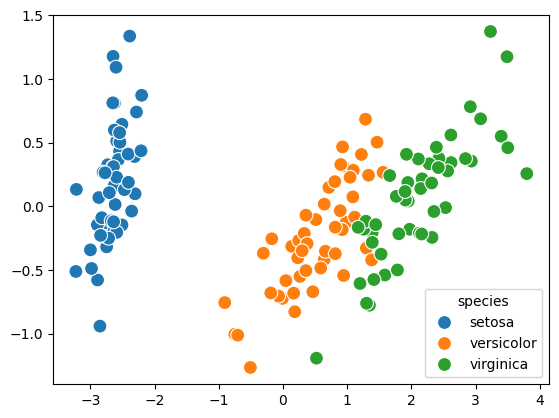

In [218]:
# Instance PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
xpca = X_pca[:, 0]
ypca = X_pca[:, 1]

# plot
sns.scatterplot(x=xpca, y=ypca, hue=species, s=100)
plt.show()

_Determine the new correlation_

In [219]:
# Determine correlation after PCA
pca_correlation, pca_pval = pearsonr(xpca, ypca)
pca_correlation

np.float64(6.13398221105399e-15)

__Intrinsic Dimension__

Which is the  number of features need to approximate the dataset.

Let consider only 3 features from the iris dataset
- Sepal Length
- Sepal Width
- Petal Width

In [220]:
# Filter for versicolor species
versicolor = iris[iris['species'] == 'versicolor']
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster_scaled
50,7.0,3.2,4.7,1.4,versicolor,0,0
51,6.4,3.2,4.5,1.5,versicolor,2,0
52,6.9,3.1,4.9,1.5,versicolor,0,0
53,5.5,2.3,4.0,1.3,versicolor,2,0
54,6.5,2.8,4.6,1.5,versicolor,2,0


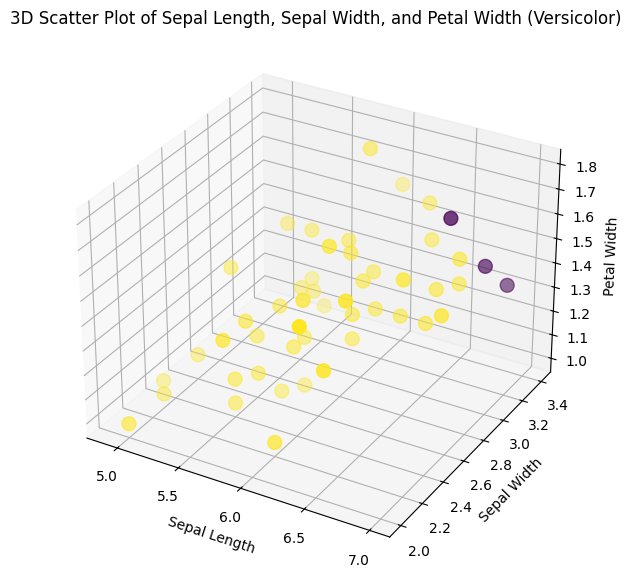

In [221]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    versicolor['sepal_length'],
    versicolor['sepal_width'],
    versicolor['petal_width'],
    c=versicolor['cluster'], s=100
)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Width')
ax.set_title('3D Scatter Plot of Sepal Length, Sepal Width, and Petal Width (Versicolor)')
plt.show()

Since the data lies almost on 2D it means it can be approximated using 2 features

PCA identifies intrinsic dimension when samples have any number of features.

Variance and intrinsic dimension

intrinsic dimension is the number of PCA features with significant variance

In [222]:
versicolor_first3 = versicolor.iloc[:, :3]
versicolor_first3.head()

,sepal_length,sepal_width,petal_length
50,7.0,3.2,4.7
51,6.4,3.2,4.5
52,6.9,3.1,4.9
53,5.5,2.3,4.0
54,6.5,2.8,4.6


In [223]:
# instance PCA and fit to versicolor_first3
pca = PCA()
pca.fit(versicolor_first3)

PCA()

In [224]:
# create range of features
features = range(pca.n_components_)

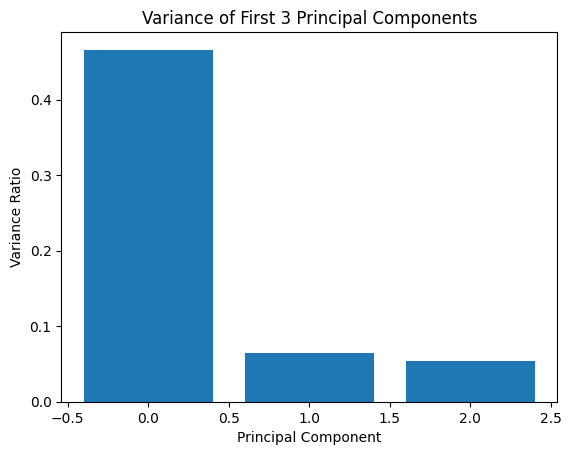

In [225]:
# bar plot the features
plt.bar(features, pca.explained_variance_)
plt.title('Variance of First 3 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

Scale using Standard Scaler

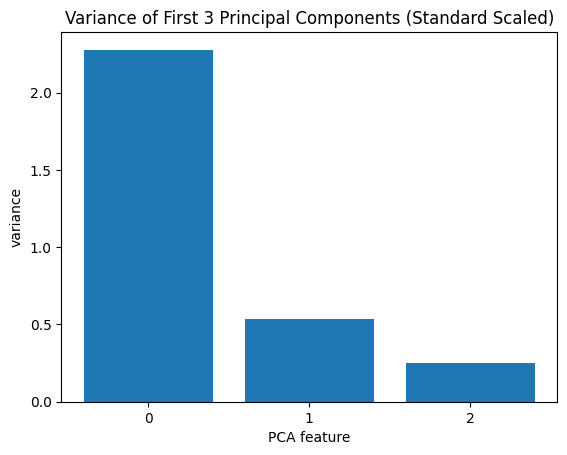

In [226]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(versicolor_first3)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.title('Variance of First 3 Principal Components (Standard Scaled)')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

__Dimension Reduction with PCA__

Remember the iris dataset has 4 features

In [227]:
# see features below
X.shape

(150, 4)

It can be seen the data is 150 obsertions by 4 features

Let use PCA to reduce it to 2

In [228]:
# instance of StandardScaler class with 2 component
pca = PCA(n_components=2)
transformed = pca.fit_transform(X)
transformed.shape

(150, 2)

Now reduced to 150 observations by 2 features by discarding the low variance features

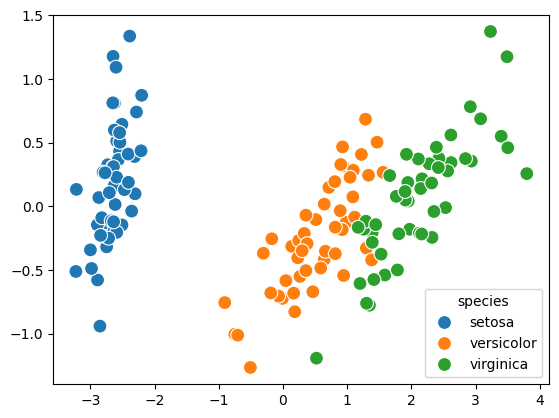

In [229]:
# plot
x_pca = transformed[:,0]
y_pca = transformed[:,1]
sns.scatterplot(x=x_pca, y=y_pca, hue=species, s=100)
plt.show()

In [230]:
# TruncatedSVD and csr_matrix
svd = TruncatedSVD(n_components=3)
transformed = svd.fit_transform(X)
transformed.shape

(150, 3)

In [231]:
# Create a TruncatedSVD instance: svd
svd_k = TruncatedSVD(n_components=3)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd_k, kmeans)

In [232]:
# Fit the pipeline to articles
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'species': species})

# Display df sorted by cluster label
print(df.sort_values(by='label'))

     label    species
0        0     setosa
1        0     setosa
2        0     setosa
3        0     setosa
4        0     setosa
..     ...        ...
141      2  virginica
145      2  virginica
144      2  virginica
147      2  virginica
148      2  virginica

[150 rows x 2 columns]


In [233]:
# cross tabulate it
ct_t = pd.crosstab(df['label'], df['species'])
ct_t

species,setosa,versicolor,virginica
label,,,
0,50,0,0
1,0,48,14
2,0,2,36


__Non-negative Matrix Factorization (NMF)__

Its also a dimension reduction technoques, unlike PCA its interpretable. It is easy to explain, however all sample features must be non-negative (>=0).

It also work with numpy arrays and csr_matrix

In [234]:
# instance NMF
nmf = NMF(n_components=3)
nmf.fit(X)

NMF(n_components=3)

In [235]:
# print NMF component
nmf_features = nmf.transform(X)
print(nmf.n_components_)
print(nmf_features.round(3))

3
[[0.26  0.039 0.727]
 [0.197 0.004 0.857]
 [0.236 0.037 0.676]
 [0.22  0.066 0.685]
 [0.278 0.062 0.639]
 [0.306 0.131 0.63 ]
 [0.271 0.106 0.514]
 [0.246 0.053 0.731]
 [0.203 0.052 0.679]
 [0.202 0.011 0.852]
 [0.273 0.041 0.777]
 [0.251 0.091 0.647]
 [0.196 0.    0.841]
 [0.225 0.014 0.611]
 [0.313 0.    0.782]
 [0.371 0.125 0.535]
 [0.319 0.074 0.611]
 [0.265 0.058 0.692]
 [0.274 0.064 0.841]
 [0.305 0.107 0.566]
 [0.224 0.034 0.917]
 [0.296 0.115 0.575]
 [0.306 0.054 0.443]
 [0.239 0.115 0.724]
 [0.242 0.133 0.661]
 [0.187 0.02  0.91 ]
 [0.255 0.106 0.666]
 [0.253 0.041 0.776]
 [0.242 0.015 0.815]
 [0.227 0.079 0.69 ]
 [0.209 0.056 0.778]
 [0.242 0.044 0.839]
 [0.332 0.092 0.548]
 [0.343 0.073 0.598]
 [0.208 0.03  0.818]
 [0.232 0.    0.78 ]
 [0.254 0.    0.855]
 [0.276 0.055 0.629]
 [0.22  0.049 0.63 ]
 [0.242 0.041 0.775]
 [0.272 0.056 0.643]
 [0.131 0.    0.897]
 [0.248 0.073 0.543]
 [0.28  0.156 0.553]
 [0.298 0.183 0.55 ]
 [0.207 0.035 0.778]
 [0.296 0.102 0.605]
 [0.237 0.0

__Reconstruction of a Sample__

X reconstruction

In [237]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, columns=['component 1', 'component 2', 'component 3'])
df

,component 1,component 2,component 3
0,0.259670,0.038888,0.726802
1,0.196945,0.004105,0.856644
2,0.236285,0.037237,0.675950
3,0.219773,0.065567,0.684705
4,0.277754,0.062492,0.638800
...,...,...,...
145,0.124779,0.727153,1.103545
146,0.053541,0.611392,1.274202
147,0.115614,0.693472,1.119050
148,0.194725,0.861593,0.716642
